# Практикум №6. Нелинейная регрессия.

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)

### Часть 1.

In [157]:
df_bad = pd.read_excel('Стат205214.xls', sheet_name='Нелинейная регрессия')
df_bad = df_bad[['Temperature', 'Сharacteristic']]
df1 = df_bad.iloc[:10, :]
df1 = df1.astype('float64')
df1

,Temperature,Сharacteristic
0,10.0,0.83
1,20.0,1.09
2,30.0,1.42
3,40.0,1.86
4,50.0,2.43
5,60.0,3.19
6,70.0,4.17
7,80.0,5.45
8,90.0,7.13
9,100.0,9.33


### Подбор функциональной зависимости.

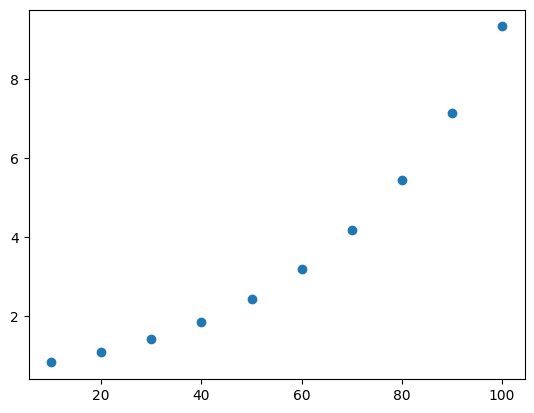

In [104]:
temp = df1['Temperature']
char = df1['Сharacteristic']
plt.scatter(temp, char)

##### Проверим на параболу.

          2
0.001135 x - 0.03597 x + 1.299


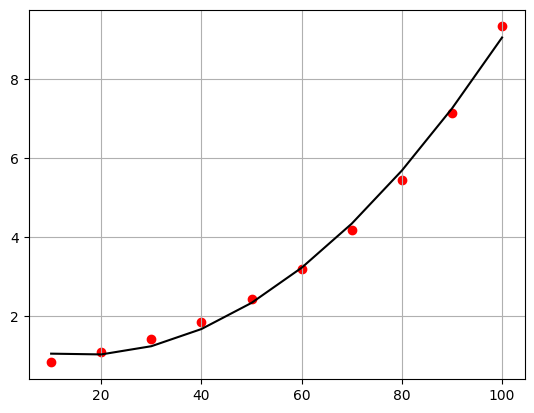

In [105]:
z = np.polyfit(temp, char, 2)
parabola = np.poly1d(z)
plt.plot(temp, parabola(temp), color = 'black')
plt.scatter(temp, char, color='red')
plt.grid()
print(parabola)

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [107]:
model = LinearRegression()

In [108]:
temp1 = temp.values.reshape(-1,1)
char1 = char.values

In [109]:
polyFeatures = PolynomialFeatures(degree=2)
temp_fit1 = polyFeatures.fit_transform(temp1)

In [110]:
model.fit(temp_fit, char)

LinearRegression()

In [111]:
R2 = r2_score(y_true=char1, y_pred=model.predict(temp_fit1))
print(R2)

0.9957581075795281


Значение $R^2$ большое, выглядит относительно неплохо. **Но проверим другие случаи.**

##### Проверим на степенную регрессию.

$$
y=ax^b
$$

Необходимо прологарифмировать, затем получим уравнение вида $ln(y)=b*ln(x)+ln(a)$, которое преобразуется в $y'=bx'+a'$.

Таким образом, в полученном уравнении линейной зависимости коэффициент $b$ будет таким же, как и в исходном степенном уравнении. Для нахождения исходного $a$ нужно взять экспоненту от полученного $a'$

In [124]:
coef = np.polyfit(np.log(temp), np.log(char), 1)
linear_equation = np.poly1d(coef)
b = coef[0]
a = np.exp(coef[1])
powerLine = a * temp**b
print(linear_equation) #линейная регрессия в новых билогарифмических координатах

 
1.056 x - 3.004


Запишем нужное уравнение при помощи f-строки.

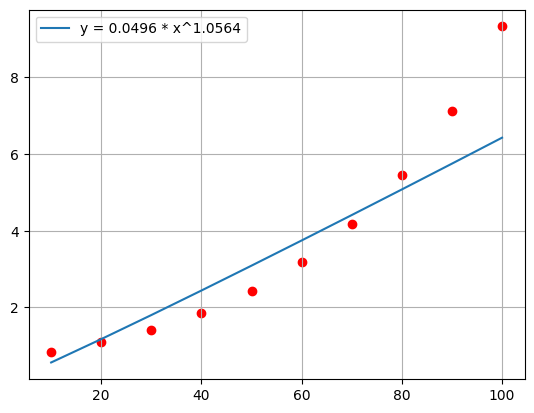

In [129]:
plt.plot(temp, powerLine, label = f'y = {a:.4f} * x^{b:.4f}')
plt.scatter(temp, char, color = 'red')
plt.grid()
plt.legend()

Тут даже "на глаз" всё плохо.

##### Проверим на экспоненциальную регрессию.

Прологарифмируем $y=ae^{xb}$, получим после замены переменных $y'=a' + bx'$ => `np.polyfit` к $ln(y)$ и $x$

In [136]:
expcoefs = np.polyfit(temp, np.log(char), 1)
exp_equation = np.poly1d(expcoefs)
b = expcoefs[0]
a = np.exp(expcoefs[1])
expLine = a*np.exp(temp*b)

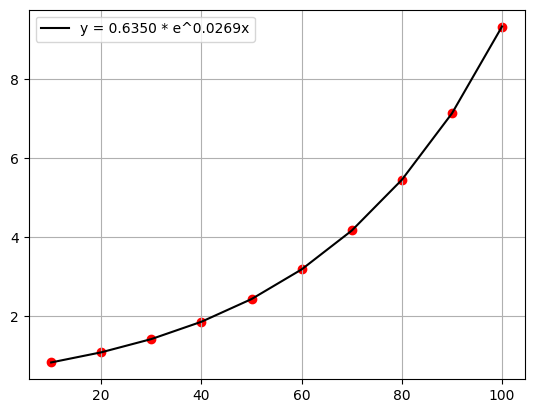

In [143]:
plt.plot(temp, expLine, label = f'y = {a:.4f} * e^{b:.4f}x', color = 'black')
plt.scatter(temp, char, color = 'red')
plt.grid()
plt.legend()

### Часть 2.

In [11]:
df2_bad = df_bad.iloc[10:,:]
newHeader = df2_bad.iloc[0]
df2 = df_bad.iloc[11:, :]
df2.columns = newHeader
df2 = df2.astype('float64')
conc = df2['Concentration']
abs = df2['Absorption']
df2

10,Concentration,Absorption
11,0.1,0.81
12,0.2,0.97
13,0.3,1.07
14,0.4,1.15
15,0.5,1.22
16,0.6,1.28
17,0.7,1.33
18,0.8,1.38
19,0.9,1.42
20,1.0,1.46


##### Проверим на степеннную регрессию $y=ax^b$

In [12]:
coef = np.polyfit(np.log(conc), np.log(abs), 1)
linear_equation = np.poly1d(coef)
b = coef[0]
a = np.exp(coef[1])
powerLine = a * conc**b
print(linear_equation)
print(f'Оценка коэффициентов: a = {a:.4f}, b = {b:.4f}')

 
0.2554 x + 0.3772
Оценка коэффициентов: a = 1.4581, b = 0.2554


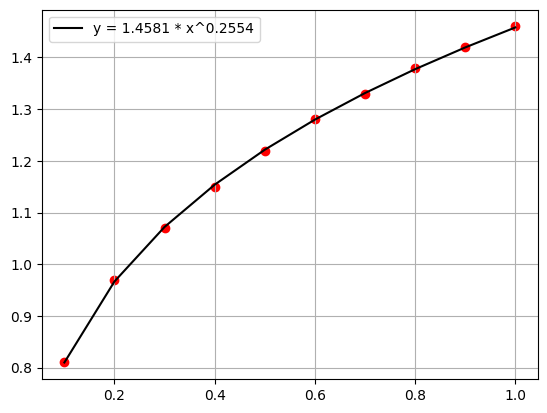

In [26]:
plt.plot(conc, powerLine, color = 'black', label = f'y = {a:.4f} * x^{b:.4f}')
plt.scatter(conc, abs, color = 'red')
plt.legend()
plt.grid()

Линеаризация.

Text(0, 0.5, 'ln(abs)')

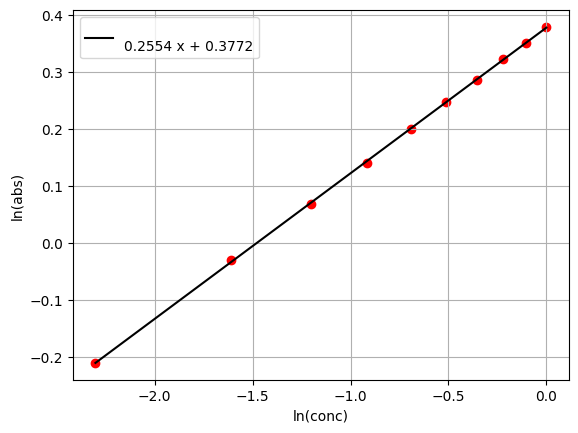

In [48]:
plt.plot(np.log(conc), linear_equation(np.log(conc)), color = 'black', label = linear_equation)
plt.scatter(np.log(conc), np.log(abs), color = 'red')
plt.legend()
plt.grid()
plt.xlabel('ln(conc)')
plt.ylabel('ln(abs)')

In [17]:
model = LinearRegression()

In [20]:
conc1 = np.log(conc.values.reshape(-1,1))
abs1 = np.log(abs.values)

In [21]:
model.fit(conc1, abs1)

LinearRegression()

In [23]:
R2 = r2_score(y_true=abs1, y_pred=model.predict(conc1))
R2

0.9998885851203857

Видно, что зависимость описывается очень хорошо.

#### Случай изотермы Ленгмюра $y=\frac{x} {ax+b}$

В данном случае в голову не приходит какой-то удобный прием наподобие логарифмирования. <br> Воспользуемся постепенным увеличением степени в полиномиальной регрессии.

Степень "2" не подходит, начнём с "3".

In [34]:
coefs = np.polyfit(conc, abs, 3)
equation = np.poly1d(coefs)
print(equation)

        3         2
0.7479 x - 1.798 x + 1.866 x + 0.649


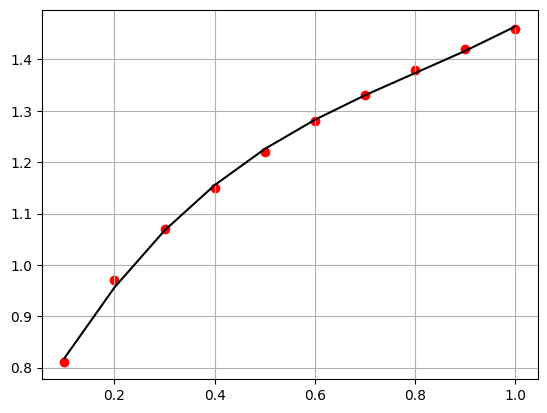

In [35]:
plt.plot(conc, equation(conc), color = 'black')
plt.scatter(conc, abs, color = 'red')
plt.grid()

In [27]:
model = LinearRegression()

In [29]:
conc2 = conc.values.reshape(-1,1)
abs2 = abs.values

In [30]:
polyFeatures = PolynomialFeatures(degree=3)
concFit = polyFeatures.fit_transform(conc2)

In [31]:
model.fit(concFit, abs2)

LinearRegression()

In [32]:
R2 = r2_score(y_true= abs2, y_pred=model.predict(concFit))
R2

0.9989672520947004

У варианта с экпоненциальной регрессией $R^2$ больше, поэтому выберем его.

Таким образом, коэффициенты $a$ и $b$ в $y=ax^b$ равны

In [40]:
print(f'a={a:.4f}')
print(f'b={b:.4f}')
print(f'y = {a:.4f}*x^{b:.4f}')

a=1.4581
b=0.2554
y = 1.4581*x^0.2554
